In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pickle
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
import seaborn as sns



In [ ]:
spam_data1 = pd.read_csv(r"C:\Users\Mayank Aman\Desktop\SC Pbl\spam.csv", encoding="ISO-8859-1")
spam_data1 = spam_data1[['v1', 'v2']]
spam_data1.columns = ['label', 'message']


try:
    spam_data2 = pd.read_csv(r"C:\Users\Mayank Aman\Desktop\SC Pbl\processed_data.csv")
    
    
    print("Second dataset loaded successfully.")
    print("Columns in second dataset:", spam_data2.columns.tolist())

    
    spam = pd.concat([spam_data1, spam_data2], ignore_index=True)

except FileNotFoundError:
    print("Error: 'processed_data.csv' not found. Continuing with the original dataset only.")
    spam = spam_data1

Second dataset loaded successfully.
Columns in second dataset: ['label', 'subject', 'email_to', 'email_from', 'message']


In [ ]:
spam.drop_duplicates(inplace=True)
spam.dropna(inplace=True)

print(f"\nTotal messages in the combined dataset: {spam.shape[0]}")
print("Dataset preview after combining:")
print(spam.head())


Total messages in the combined dataset: 71444
Dataset preview after combining:
     label                                            message  \
5572     1  Content-Type: text/html;\nContent-Transfer-Enc...   
5573     0  Hi, i've just updated from the gulus and I che...   
5574     1  Content-Type: text/plain;\n\tcharset="iso-8859...   
5575     1  Hey Billy, \n\nit was really fun going out the...   
5576     1  Content-Type: multipart/alternative;\n        ...   

                                                subject  \
5572                  Generic Cialis, branded quality@    
5573                             Typo in /debian/README   
5574                                   authentic viagra   
5575                               Nice talking with ya   
5576  or trembling; stomach cramps; trouble in sleep...   

                             email_to  \
5572        the00@speedy.uwaterloo.ca   
5573  debian-mirrors@lists.debian.org   
5574         <the00@plg.uwaterloo.ca>   
5575      

In [ ]:
from nltk.corpus import stopwords
import re

stop_words = set(stopwords.words('english'))

def preprocess_text(message):
    """
    A function to clean text by removing non-alphabetic characters,
    stopwords, and converting to lowercase. Stemming is removed for performance.
    """
    
    review = re.sub('[^a-zA-Z]', ' ', message).lower()
    
    
    review = review.split()
    
    
    review = [word for word in review if word not in stop_words]
    
       
    return ' '.join(review)

print("\nStarting fastest text preprocessing (no stemming)...")
corpus = spam['message'].apply(preprocess_text).tolist()
print("Preprocessing complete.")


Starting fastest text preprocessing (no stemming)...
Preprocessing complete.


In [ ]:
cv = CountVectorizer(max_features=4000)
X = cv.fit_transform(corpus).toarray()
Y = pd.get_dummies(spam['label'], drop_first=True).values.ravel() # Simplified label encoding



In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.20, random_state=42)



In [ ]:
print("\n--- Training Models on Combined Dataset ---")


--- Training Models on Combined Dataset ---


In [11]:
# Random Forest Classifier
model1 = RandomForestClassifier()
model1.fit(X_train, Y_train)
print("Random Forest training complete.")

# Decision Tree Classifier
model2 = DecisionTreeClassifier()
model2.fit(X_train, Y_train)
print("Decision Tree training complete.")

# Multinomial Naive Bayes
model3 = MultinomialNB()
model3.fit(X_train, Y_train)
print("Multinomial Naive Bayes training complete.")



Random Forest training complete.
Decision Tree training complete.
Multinomial Naive Bayes training complete.


In [ ]:
print("\n--- Model Evaluation Results ---")

pred1 = model1.predict(X_test)
pred2 = model2.predict(X_test)
pred3 = model3.predict(X_test)



--- Model Evaluation Results ---


In [ ]:
print("\nRandom Forest Classifier")
print("Confusion Matrix: ")
print(confusion_matrix(Y_test, pred1))
print("Accuracy: ", accuracy_score(Y_test, pred1))
print("Classification Report:\n", classification_report(Y_test, pred1))
print("-" * 30)

print("Decision Tree Classifier")
print("Confusion Matrix: ")
print(confusion_matrix(Y_test, pred2))
print("Accuracy: ", accuracy_score(Y_test, pred2))
print("Classification Report:\n", classification_report(Y_test, pred2))
print("-" * 30)

print("Multinomial Naïve Bayes")
print("Confusion Matrix: ")
print(confusion_matrix(Y_test, pred3))
print("Accuracy: ", accuracy_score(Y_test, pred3))
print("Classification Report:\n", classification_report(Y_test, pred3))



Random Forest Classifier
Confusion Matrix: 
[[4900   35]
 [  40 9314]]
Accuracy:  0.9947512072223389
Classification Report:
               precision    recall  f1-score   support

       False       0.99      0.99      0.99      4935
        True       1.00      1.00      1.00      9354

    accuracy                           0.99     14289
   macro avg       0.99      0.99      0.99     14289
weighted avg       0.99      0.99      0.99     14289

------------------------------
Decision Tree Classifier
Confusion Matrix: 
[[4841   94]
 [  88 9266]]
Accuracy:  0.987262929526209
Classification Report:
               precision    recall  f1-score   support

       False       0.98      0.98      0.98      4935
        True       0.99      0.99      0.99      9354

    accuracy                           0.99     14289
   macro avg       0.99      0.99      0.99     14289
weighted avg       0.99      0.99      0.99     14289

------------------------------
Multinomial Naïve Bayes
Confusion 

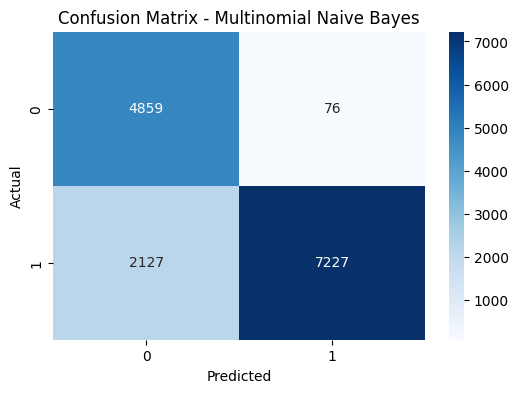

In [ ]:
plt.figure(figsize=(6, 4))
sns.heatmap(confusion_matrix(Y_test, pred3), annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix - Multinomial Naive Bayes")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

In [ ]:
print("\n--- Saving Models and Vectorizer ---")

pickle.dump(model1, open("RFC_combined.pkl", 'wb'))
pickle.dump(model2, open("DTC_combined.pkl", 'wb'))
pickle.dump(model3, open("MNB_combined.pkl", 'wb'))
print("Saved all models successfully with '_combined' suffix.")


--- Saving Models and Vectorizer ---
Saved all models successfully with '_combined' suffix.


In [ ]:
pickle.dump(cv, open("vectorizer_combined.pkl", 'wb'))
print("Vectorizer saved successfully!")

Vectorizer saved successfully!
